# Boston Housing Dataset

This is a copy of UCI ML housing dataset [found here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/).

**Reference**: The Boston house-price data of Harrison, D. and Rubinfeld, D.L. ‘Hedonic prices and the demand for clean air’, J. Environ. Economics & Management, vol.5, 81-102, 1978. Used in Belsley, Kuh & Welsch, ‘Regression diagnostics …’, Wiley, 1980. N.B. Various transformations are used in the table on pages 244-261 of the latter.

Features in dataset:

- CRIM per capita crime rate by town

- ZN proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS proportion of non-retail business acres per town

- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

- NOX nitric oxides concentration (parts per 10 million)

- RM average number of rooms per dwelling

- AGE proportion of owner-occupied units built prior to 1940

- DIS weighted distances to five Boston employment centres

- RAD index of accessibility to radial highways

- TAX full-value property-tax rate per $10,000

- PTRATIO pupil-teacher ratio by town

- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

- LSTAT % lower status of the population

- MEDV Median value of owner-occupied homes in $1000’s

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

Create a pandas DataFrame from the numpy ndarrays stored in boston_dataset.data:

In [3]:
boston_df = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Add the target feature into the DataFrame: `MEDV`

In [4]:
boston_df['MEDV'] = boston_dataset.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
boston_df.shape

(506, 14)

### There are 506 records with 13 features and 1 target.

In [6]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [7]:
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

## Summary Statistics

For simplicity, we round numbers to the second decimal point.

In [8]:
boston_df.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


### Example analysis:
https://scikit-learn.org/stable/datasets/index.html

* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    * Binary feature with mean 0.07 and third quartile (75%) of zero, meaning most values are zero.
    
* RM: average number of rooms per dwelling
    * Has mean of 6.28 and median (50%) of 6.21, so it is somewhat symmetric. Ranges from 3.56 to 8.78.

## Visualization

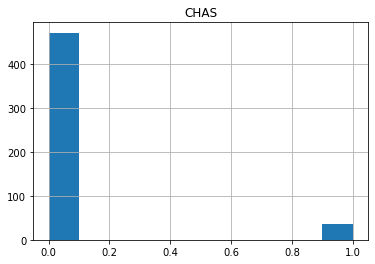

In [9]:
boston_df.hist(column='CHAS')
plt.show()

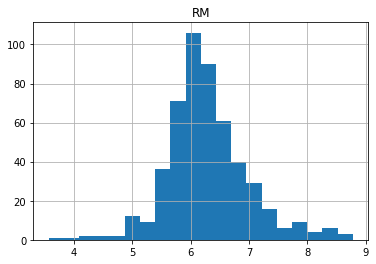

In [10]:
boston_df.hist(column='RM', bins = 20)
plt.show()

#### Looks symmetric!

## Correlation between features

* Remember, a correlation coefficient measures linear relationships between variables and ranges from -1 to 1.
* We use a correlation matrix which displays all correlation coefficients between features.

In [11]:
corr_matrix = boston_df.corr().round(2)
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


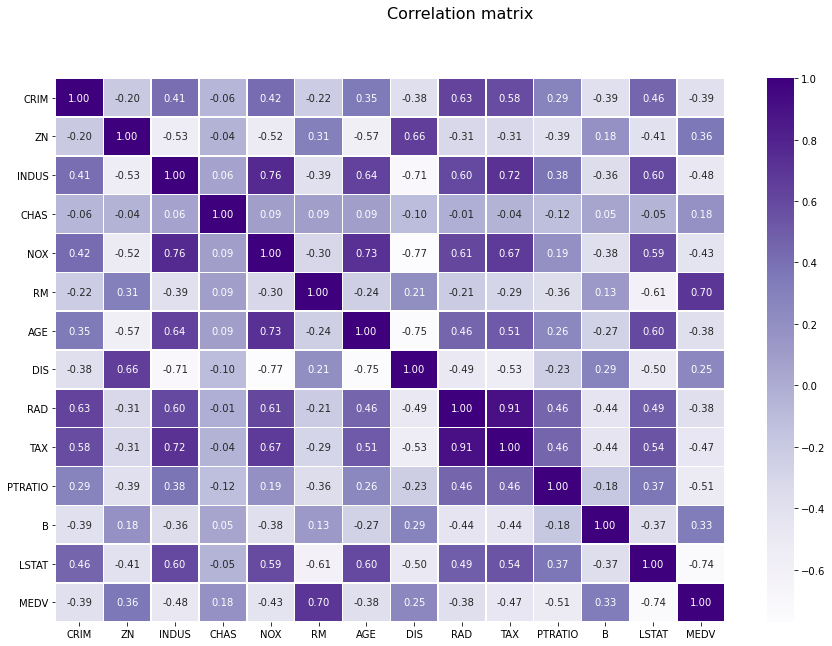

In [14]:
# Let's make our correlation matrix a little prettier
fig, ax = plt.subplots(figsize=(15,10))
fig.suptitle('Correlation matrix', fontsize=16)
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidth = 0.5,
                 fmt = '.2f',
                 cmap='Purples');

The target feature is `MEDV`: Median value of owner-occupied homes in $1000’s.

* The most negatively correlated feature (-0.74) is LSTAT (% lower status of the population).
* The most positively correlated feature (0.70) is RM (average number of rooms per dwelling).

## Feature selection

Since `RM` is the most positively correlated featurem let's visualize its relation with the targe feature (`MEDV`):

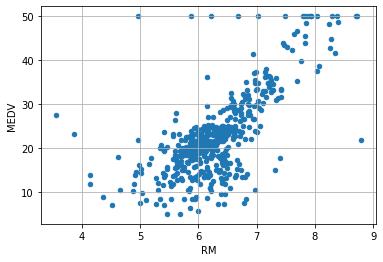

In [15]:
boston_df.plot(kind = 'scatter', x = 'RM', y = 'MEDV')
plt.grid();

Looks very linear!

There seems to be a ceiling at 50...

Let's check the `LSTAT` feature:

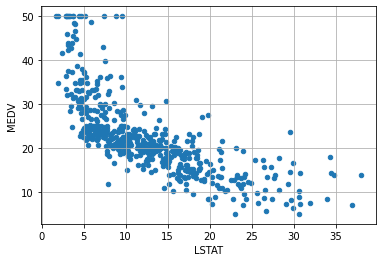

In [16]:
boston_df.plot(kind = 'scatter', x = 'LSTAT', y = 'MEDV')
plt.grid();

It is negatively correlated, but `RM` appears a better choice for a linear regression!

* We will try a univariate linear regression of the form: MEDV = b + m*RM.

## Preparing the data for fitting


In Scikit-Learn, models require a two-dimensional feature matrix (X, 2darray or pandas df) and a one-dimensional target array (Y).

### Preparing the feature matrix

* Remenber we'll first try univariate linear regression, so we'll use a single feature. To fit sklearn requirements, we'll declare a 2d data structure.

In [17]:
# Using double [] to remain a DataFrame (2d structure)
X = boston_df[['RM']]
X.shape

(506, 1)

### Preparing the target column

In [18]:
# Single [] returns a pandas Series, which is 1d
Y = boston_df['MEDV']
Y.shape

(506,)

## Instantiating the model

Using a linear regression model.

In [19]:
# Instantiating
model = LinearRegression()

### Train-test Split

* We train the model using a training set and save an unseen testing set for evaluation

* Our rule of thumb is to split data 70-30%

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.3,
                                                    random_state = 1)
# We set a `random_sate` so that results are reproducible.

In [21]:
# Check dimensions to ensure same number of rows:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(354, 1)
(354,)
(152, 1)
(152,)


## Fitting the model

Let's apply the instantiated model to our training data:

In [22]:
model.fit(X_train,Y_train)

LinearRegression()

### Check parameter estimates

Remember, we are fitting a linear model:
* MEDV = b + m*RM

Where b is the `intercept` and m is the `coefficient` (slope).

By convention all model parameters have trailing underscores.

In [23]:
model.intercept_.round(2)

-30.57

In [24]:
model.coef_.round(2)

array([8.46])

So, our fitted model is
* MEDV = -30.57 + 8.46*RM

## Making predictions

Once the model is trained, supervised machine learning (when we have a target feature with values) will evaluate test data based on **predictions** for the unseen data.

We can make predictions with the **predict()** method.

In [25]:
# Choosing a value for RM to predict a MEDV.
# Notice the two [] to ensure it is a 2d structure
new_RM = np.array([[6.5]])


model.predict(new_RM)

array([24.42606323])

Our model predicted a price of $24,426.06 for a average number of rooms per dwelling of 6.5.

* This result is the same as doing `model.intercept_ + model.coef_*6.5`

We can feed the testing set and get predictions for all homes in the Y set:

In [26]:
y_test_predicted = model.predict(X_test)

print(y_test_predicted.shape)
print(type(y_test_predicted))

(152,)
<class 'numpy.ndarray'>


In [27]:
# Same shape as
Y_test.shape

(152,)

## Evaluating the model

* First, we visually compare fitted curve with actual data:

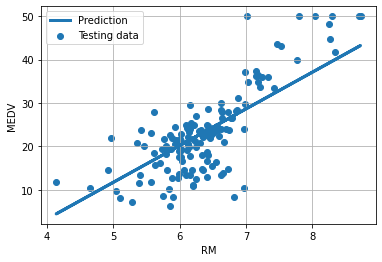

In [28]:
plt.scatter(X_test, Y_test, label = 'Testing data')
plt.plot(X_test, y_test_predicted, label = 'Prediction', linewidth = 3)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend(loc = 'upper left')
plt.grid()
plt.show();

### Calculating the residual (or error)

* Residual: distance between data points and fitted curve

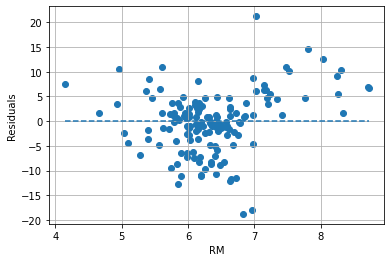

In [29]:
residuals = Y_test - y_test_predicted

# Plotting the residuals
plt.scatter(X_test, residuals)

# Plotting a horizontal line at y = 0
plt.hlines(y = 0, xmin= X_test.min(), xmax = X_test.max(), linestyle = '--')

# Set xlim
# plt.xlim((4,9))

plt.xlabel('RM')
plt.ylabel('Residuals')
plt.grid()
plt.show()

A good sign that the model is working is to have a seemingly random distribution of residuals around zero.

## Mean squared error

We can calculate the mean squared error (**MSE**) as:

In [30]:
(residuals**2).mean()

36.517214730838624

We can also use `sklearn`'s **mean_squared_erros()** method from the metrics module:

In [31]:
mean_squared_error(Y_test, y_test_predicted)

36.517214730838624

### R-squared

A common metric to evaluate the model performance is called R-squared. It is the proportion of total variation explained by the model. It is called with **model.score()**:

In [32]:
model.score(X_test, Y_test)

0.6015774471545623

The total variation is calculated as the sum of squares of the difference between the answer and the mean of the answer:

In [33]:
t_var= ((Y_test - Y_test.mean())**2).sum()
t_var

13931.482039473683

Variation that the model fails to captures:

In [34]:
m_var = (residuals**2).sum()
m_var

5550.6166390874705

Proportion of total variation from the data:

In [35]:
1 - m_var/t_var

0.6015774471545623

Which is the same as `model.score()`.

## Multivariate linear regression

We can add a feature to build a **multivariate linear regression model**.

Recalling the correlation of MEDV with LSTAT, we can try to find a fit of the form:
    MEDV = b0 + b1*RM + b2*LSTAT
    
All steps of the model are the same except for the data preparation, as we are dealing with an extra features column.

In [36]:
## data preparation
X2 = boston_df[['RM', 'LSTAT']]
Y = boston_df['MEDV']

## split the data and keep same random state for same splits
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y,
                                                      test_size = 0.3,
                                                      random_state = 1)

# Instantiate the model
model2 = LinearRegression()

# train the model
model2.fit(X2_train, Y_train)

LinearRegression()

In [37]:
# Accesing parameters:
print(model2.intercept_)
print(model2.coef_)

5.316818471096038
[ 4.12674118 -0.67762654]


Our model is then:
    MEDV = 5.32 +4.13*RM - 0.68*LSTAT
    
And we can make predictions:

In [38]:
y_test_predicted2 = model2.predict(X2_test)

### Comparing the models

Let's compare an easy metric: the **mean squared error (MSE)**.

Recalling the first model:

In [39]:
mean_squared_error(Y_test, y_test_predicted).round(2)

36.52

And for the second model:

In [40]:
mean_squared_error(Y_test, y_test_predicted2).round(2)

28.93

The multivariate model has (36.52 - 28.93)/36.52 = 21% reduction in the MSE. Thus, it does a better job predicting the MEDV.